<a href="https://colab.research.google.com/github/Loop3D/2022_iamg_workshop/blob/main/map2loop/2a_m2l_wa_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2a m2l wa example
### Installing dependencies
This notebook will use two main libraries from the Loop project
1. LoopStructural -    
https://github.com/Loop3D/LoopStructural   
https://gmd.copernicus.org/articles/14/3915/2021/   
2. map2loop -    
https://github.com/Loop3D/map2loop-2   
https://gmd.copernicus.org/articles/14/5063/2021/

The following code blocks will install the required dependencies for the Loop libraries into this colab environment. 




## map2loop + LoopStructural

In this first example we will use buid a model from geological data provided by a Geoserver instance of Geological Survey of Western Asutralia (GSWA) data from the Hamersley Province in  Western Australia and the online Digital Terrain Model and Stratigraphic Database of Australia from Geoscience Australia (GA). 

Five datasets are used:

1. The 1:500K GSWA Interpreted Basement Geology Map
2. The 1:500K GSWA Interpreted Basement Linear Structural features Map
3. The GSWA WAROX structural obervations database
4. The SRTM-based GA Digital Terrain Map of Australia
5. Extracts from the GA Australian Stratigraphic Units Database

In [1]:
if 'google.colab' in str(get_ipython()):
  !pip install rasterio
  !pip install git+https://github.com/geopandas/geopandas.git@v0.10.2
  !pip install hjson
  !pip install owslib
  !pip install git+https://github.com/Loop3D/map2model_cpp.git
  !pip install git+https://github.com/Loop3D/LoopProjectFile.git
  !pip install pygeos
  !pip install mplstereonet
  !pip install lavavu-osmesa==1.8.32
  !pip install git+https://github.com/Loop3d/LoopStructural
  !pip install git+https://github.com/Loop3d/map2loop-2@v1.2.10
  !pip install beartype
else:
    print('Not running on CoLab, nothing to do')
      

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 2.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/geopandas/geopandas.git (to revision v0.10.2) to /tmp/pip-req-build-vs76zb6l
  Running command git clone -q https://github.com/geopandas/geopandas.git /tmp/pip-req-build-vs76zb6l
  Running command git checkout -q a65bda0a1ec25b99b02398865fd299852f7bac46
     |████████████████████████████████| 16.7 MB 13.6 MB/s 
     |████████████████████████████████| 6.3 MB 37.1 MB/s 
  Created wheel for geopandas: filename=geopandas-0.10.2-py2.py3-none-any.whl size=1031401 sha256=fea759ed7ac5292b03a15f65c0f99832a944a314559ab00faf0d3df893a2953d
  Stored in directory: /tmp/pip-ephem-wheel-cache-_zmyae25/wheels/94/28/9a/9eda645186d70ed0e1f27e35dbdde148cd08692a9a886346a5
Successfully built geopandas
Looking in indexes: https:

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Loop3d/LoopStructural to /tmp/pip-req-build-2jy4g37j
  Running command git clone -q https://github.com/Loop3d/LoopStructural /tmp/pip-req-build-2jy4g37j
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 57 kB 4.3 MB/s 
     |████████████████████████████████| 438 kB 28.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for LoopStructural: filename=LoopStructural-1.5.3-cp37-cp37m-linux_x86_64.whl size=1158352 sha256=f23ae25d7ef70d084c6eb777d40f1b8bf046510cdc729040c01d24b5f1a2edf1
  Stored in directory: /tmp/pip-ephem-wheel-cache-aip26hcv/wheels/f0/52/f7/debbf81fca78be4c814265abfa2dd29318883cf44e61eebb93
  Created wheel for scikit-fmm: filename=scikit_fmm-2022.8.15-cp37-cp37m-linux_x86_64.whl size=221585 sha256=bc4c

In [2]:
bbox_3d = {'minx': 553150,
     'miny': 7455000,
     'maxx': 584300,
     'maxy': 7483000,
     'base': -4800,
     'top': 1200}

In [3]:
import os
import hjson
from map2loop.m2l_enums import VerboseLevel
from map2loop.project import Project

from datetime import datetime
nowtime=datetime.now().isoformat(timespec='minutes')   
out_dir=nowtime.replace(":","-").replace("T","-")


proj = Project( 
                 loopdata_state = "WA",
            project_path=out_dir,
    project_crs='EPSG:28350',
    verbose_level=VerboseLevel.NONE,
    working_projection='EPSG:28350',
                )

proj.update_config(
                    out_dir=out_dir,
                    bbox_3d=bbox_3d,
                    project_crs='EPSG:28350',
                    # overwrite='true',
                    # run_flags={'fault_dip':-999},
                    # quiet='None',
    
#                     loopFilename='test.loop3d'
                  )


The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.


Warnings:
   -> 32 NaN/blank found in column "supersuite" of geology file, replacing with 0


The warnings listed above were issued checking the GEOLOGY map



Warnings:
   -> No fault dip estimate text for fault polylines
   -> 11 NaN/blank found in column "dip_dir" of fault file, replacing with -999
   -> 11 NaN/blank found in column "dip_est" of fault file, replacing with -999


The warnings listed above were issued checking the FAULT map


In [4]:
proj.run()

100%|██████████| 100/100 [00:37<00:00,  2.68it/s]


In [5]:
minx,miny,maxx,maxy = proj.config.bbox
model_base = proj.config.bbox_3d['base']
model_top = proj.config.bbox_3d['top']

In [6]:
f=open(proj.config.tmp_path+'/bbox.csv','w')
f.write('minx,miny,maxx,maxy,lower,upper\n')
ostr='{},{},{},{},{},{}\n'.format(minx,miny,maxx,maxy,model_base,model_top)
f.write(ostr)
f.close()

In [7]:
from LoopStructural import GeologicalModel
fault_params = {'interpolatortype':'FDI',
                'nelements':1e4,
#                'step':10,
#                'fault_buffer':0.2,
#                 'force_mesh_geometry':True,
#                 'solver':'pyamg',
#                 overprints:overprints,
#                 'cpw':1,
#                 'gpw':5,
               }
foliation_params = {'interpolatortype':'FDI' , # 'interpolatortype':'PLI',
                    'nelements':5e4,  # how many tetras/voxels
                    'buffer':2.,  # how much to extend nterpolation around box
#                     'solver':'pyamg',
#                     'damp':True
                    # 'npw':0,
                    # 'regularisation':0.5
                   }


model, m2l_data = GeologicalModel.from_map2loop_directory(proj.config.project_path,
                                                              evaluate=False,
                                                          fault_params=fault_params,
                                                          rescale=False,
#                                                           vectorscale=1,
                                                          foliation_params=foliation_params)

In [8]:
model.update()

  0%|          | 0/22 [00:00<?, ?it/s]

In [9]:
from LoopStructural.visualisation import LavaVuModelViewer

In [10]:
try:
    from google.colab import output
    output.enable_custom_widget_manager()
except ImportError:
    pass

view = LavaVuModelViewer(model)
view.add_model_surfaces()
view.interactive()

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]


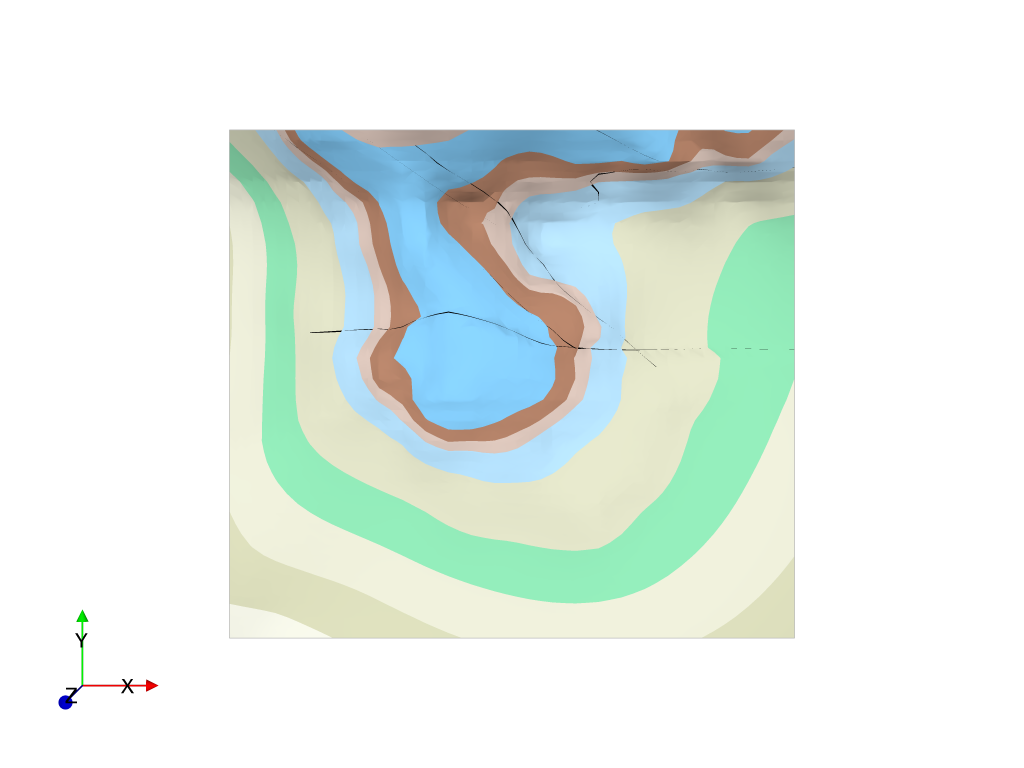

In [11]:
view.display()